🔹 Step 1: Setup & Data Loading





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arjunbhasin2013/ccdata")

print("Path to dataset files:", path)

100%|██████████| 340k/340k [00:00<00:00, 79.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/arjunbhasin2013/ccdata/versions/1


In [3]:
import pandas as pd
import os

# Check what files are inside the folder
print(os.listdir(path))


['CC GENERAL.csv']


In [4]:
df = pd.read_csv(os.path.join(path, "CC GENERAL.csv"))

# Show the first 5 rows
df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
# Display column data types, non-null counts, etc.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

🔹 Step 2: Data Preprocessing


In [6]:
# Check for missing values
print(df.isnull().sum())


# Drop 'CUST_ID' since it's not useful for clustering
df.drop('CUST_ID', axis=1, inplace=True)

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


/tmp/ipython-input-6-2782996499.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('CUST_ID', axis=1, inplace=True)


In [7]:
# Fill in the missing values
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

In [8]:
# Check for missing values after the update
print(df.isnull().sum())


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [9]:
df.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


🔹 Step 3: Exploratory Data Analysis (EDA)




In [10]:
# Summary statistics
df.describe()




,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


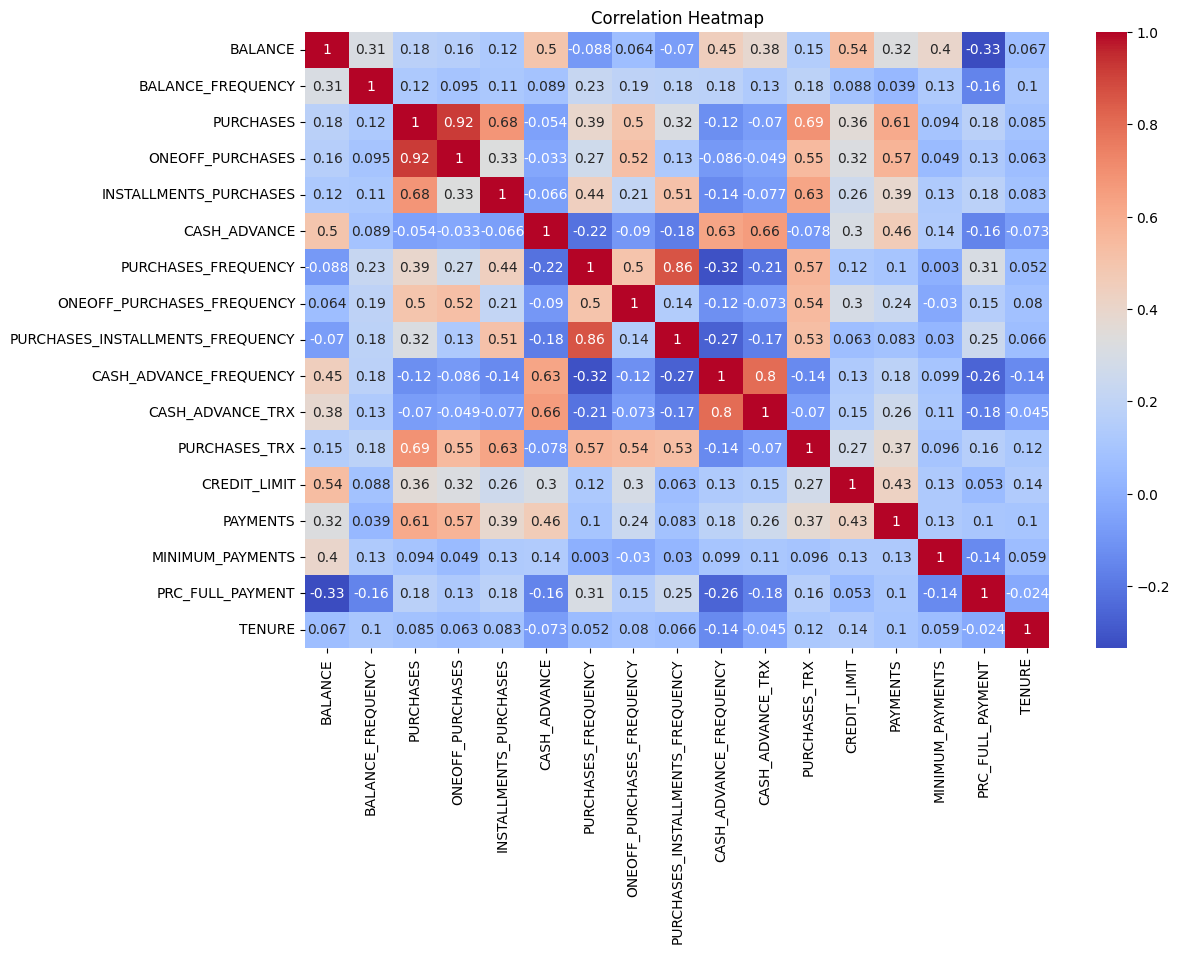

In [11]:

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


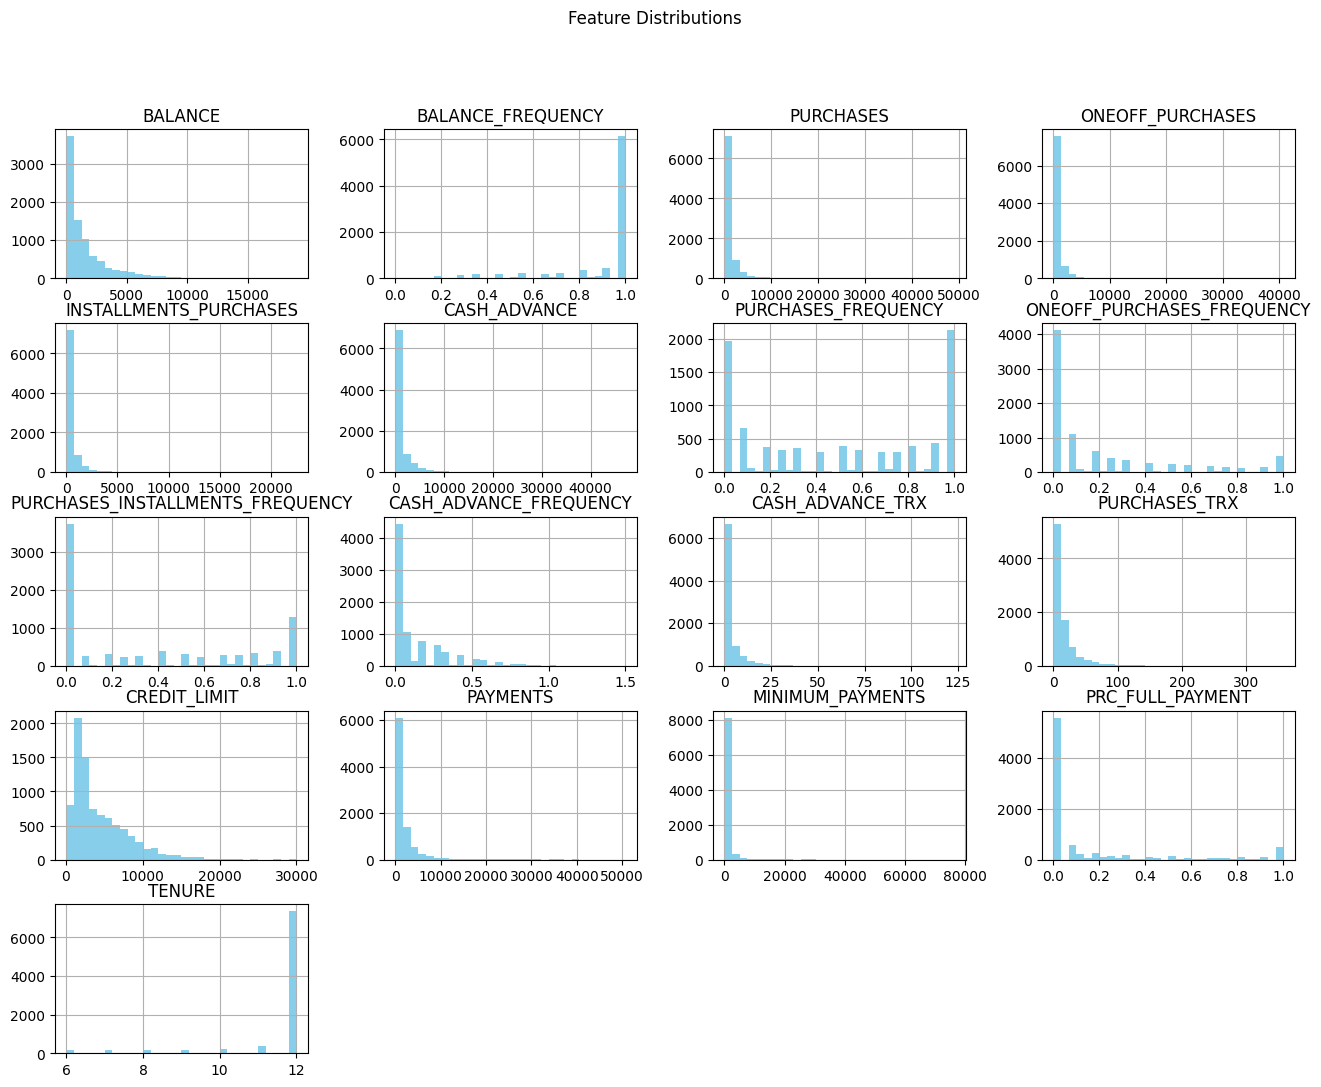

In [12]:
#HISTOGRAM
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(16, 12), color='skyblue')
plt.suptitle("Feature Distributions")
plt.show()


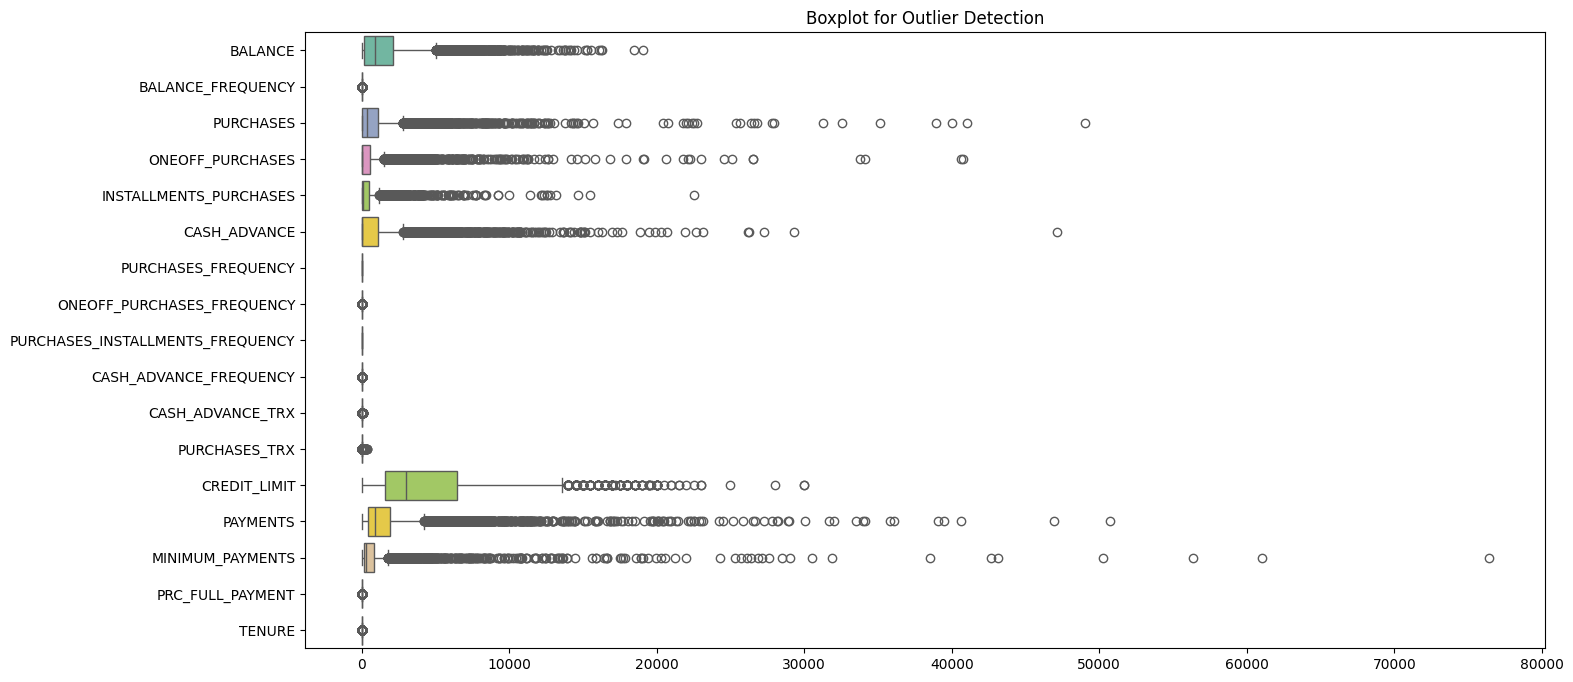

In [13]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplot for Outlier Detection")
plt.show()


🔹 Step 4: Apply Unsupervised Learning Algorithms


🔹 4.1 K-Means: Determine Optimal k using Elbow Method



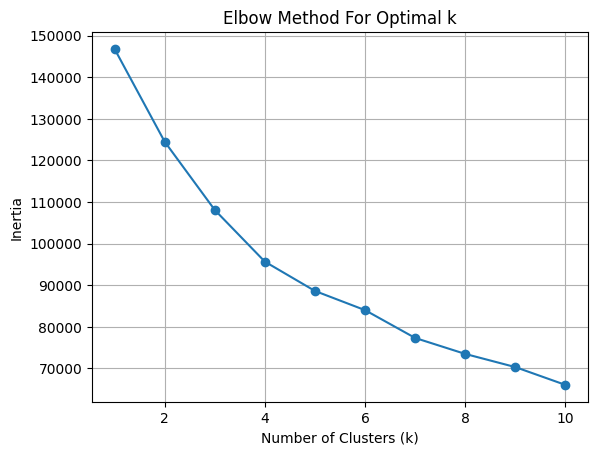

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


🔹 4.2 K-Means: Determine Optimal k using Silhouette Score


In [15]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f'Silhouette Score for k={k}: {score:.3f}')


Silhouette Score for k=2: 0.280
Silhouette Score for k=3: 0.247
Silhouette Score for k=4: 0.200
Silhouette Score for k=5: 0.190
Silhouette Score for k=6: 0.193
Silhouette Score for k=7: 0.206
Silhouette Score for k=8: 0.188
Silhouette Score for k=9: 0.197
Silhouette Score for k=10: 0.221


✅ After checking the elbow plot and silhouette scores, choose the best k.

In [16]:
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)


🔹 4.3 Agglomerative Clustering: Use Dendrogram to Choose Number of Clusters


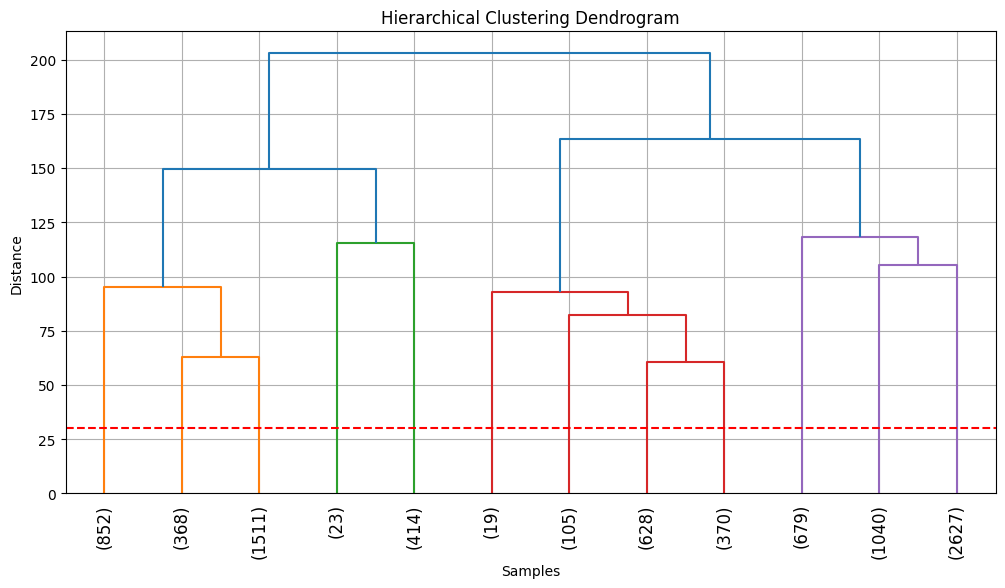

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=12, leaf_rotation=90)
plt.axhline(y=30, color='r', linestyle='--')  # Choose cut-off based on dendrogram
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


✅ Based on the dendrogram, choose the number of clusters.



In [18]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=12)
agglo_labels = agglo.fit_predict(scaled_data)


🔹 4.4 DBSCAN: Use k-Distance Graph to Estimate eps



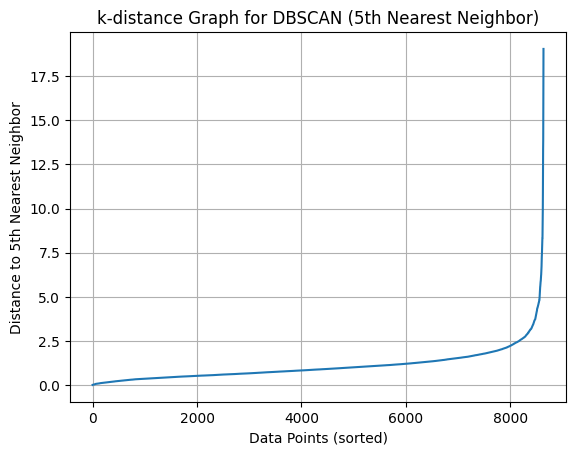

In [19]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

# Sort distances to find the elbow
distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.title('k-distance Graph for DBSCAN (5th Nearest Neighbor)')
plt.xlabel('Data Points (sorted)')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.grid(True)
plt.show()


In [20]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)


🔹 4.5 Apply PCA for Visualization (2D)



In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['KMeans'] = kmeans_labels
pca_df['Agglomerative'] = agglo_labels
pca_df['DBSCAN'] = dbscan_labels


🔹 4.6 Visualize Clusters in PCA-Reduced Space




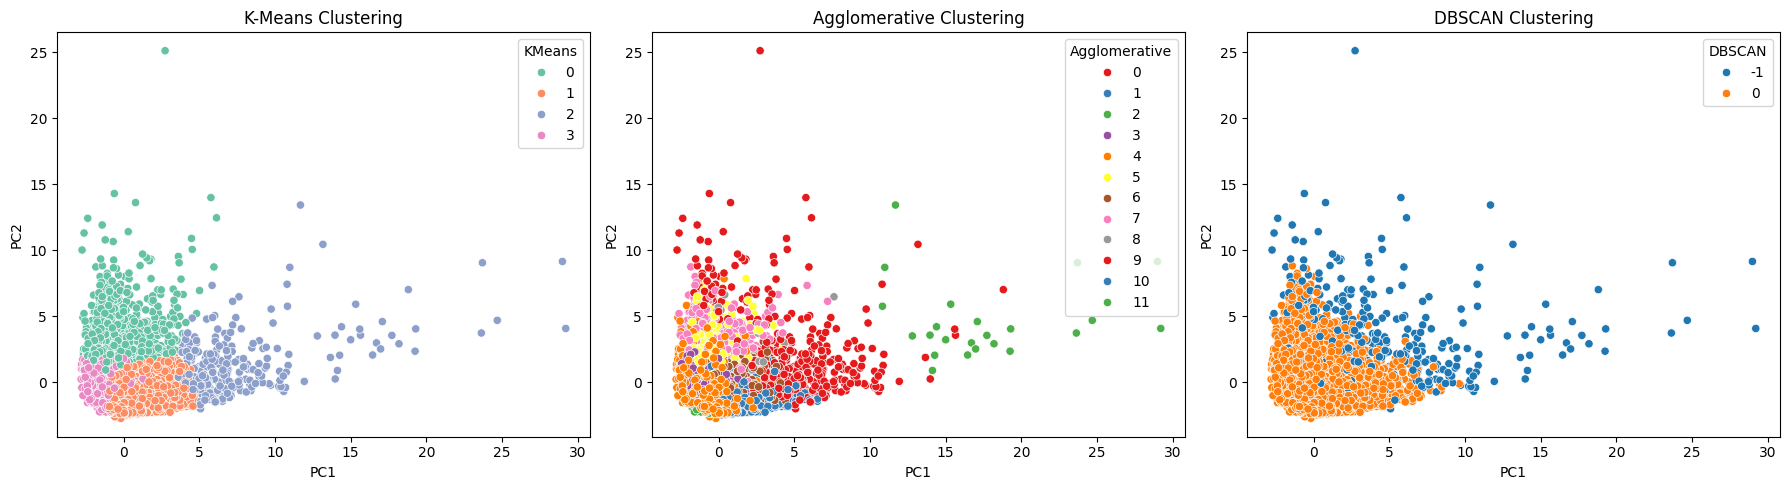

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

# KMeans
plt.subplot(1, 3, 1)
sns.scatterplot(x='PC1', y='PC2', hue='KMeans', data=pca_df, palette='Set2')
plt.title('K-Means Clustering')

# Agglomerative
plt.subplot(1, 3, 2)
sns.scatterplot(x='PC1', y='PC2', hue='Agglomerative', data=pca_df, palette='Set1')
plt.title('Agglomerative Clustering')

# DBSCAN
plt.subplot(1, 3, 3)
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN', data=pca_df, palette='tab10')
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()


🔹 Step 5: Model Evaluation & Interpretation


5.1 Silhouette Score Comparison


> 0.5 → Good clustering (clear, separated groups)

0.3 to 0.5 → Moderate clustering (some overlap)

< 0.2 → Weak clustering (likely overlapping or no clear groups)

In [23]:
from sklearn.metrics import silhouette_score

sil_kmeans = silhouette_score(scaled_data, kmeans_labels)
sil_agglo = silhouette_score(scaled_data, agglo_labels)
sil_dbscan = silhouette_score(scaled_data, dbscan_labels) if len(set(dbscan_labels)) > 1 else None

print("Silhouette Scores:")
print(f" • K-Means:       {sil_kmeans:.3f}")
print(f" • Agglomerative: {sil_agglo:.3f}")
print(f" • DBSCAN:        {sil_dbscan if sil_dbscan is not None else 'N/A'}")


Silhouette Scores:
 • K-Means:       0.200
 • Agglomerative: 0.166
 • DBSCAN:        0.5636159012342616


5.2 Visual Comparison (Cluster Plots)


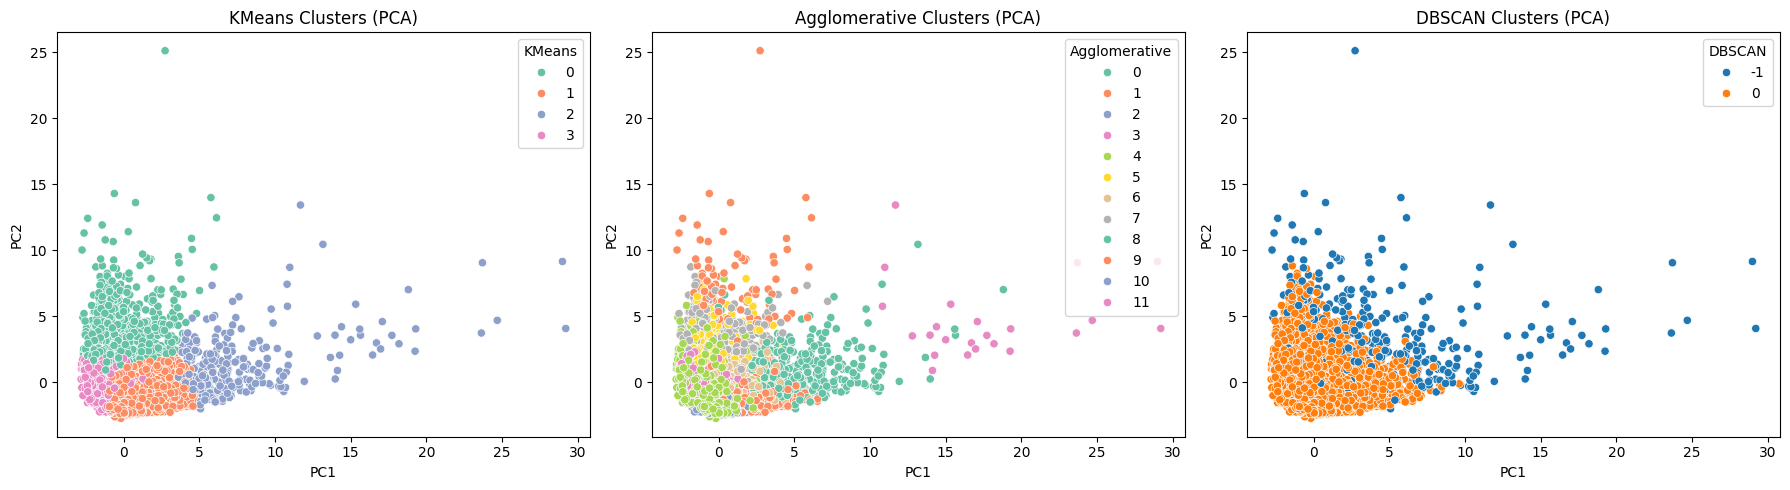

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

for i, algo in enumerate(['KMeans', 'Agglomerative', 'DBSCAN'], 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(
        x='PC1', y='PC2',
        hue=algo,
        data=pca_df,
        palette='Set2' if algo!='DBSCAN' else 'tab10',
        legend='full'
    )
    plt.title(f"{algo} Clusters (PCA)")
    plt.xlabel('PC1')
    plt.ylabel('PC2')

plt.tight_layout()
plt.show()


🔍 What patterns or behaviors define each group?

🟢 K-Means Clustering (4 clusters)
The clusters are fairly well-separated in PCA space.

One cluster is tightly grouped near the origin → likely low-activity / low-engagement customers.

Another cluster is more spread and located farther away → likely high spenders or more complex activity.

🧠 Insight: K-Means created clear clusters, suggesting different behaviors (e.g., high spenders vs. dormant users), but the separation is not perfect.

🔴 Agglomerative Clustering (12 clusters)
This model generated too many small clusters, many of which overlap.

There's no clear separation, and clusters are dense in the same region.

🧠 Insight: Over-clustering — difficult to interpret real patterns. Not ideal for customer segmentation here.

🟠 DBSCAN Clustering
Only 1 main cluster (orange) and many outliers (blue dots) labeled as -1.

The main cluster is very tight and compact — these are consistent, dense behavior patterns.

Outliers may represent customers with unusual or extreme spending patterns, noisy behavior, or simply low activity.

🧠 Insight:

The main DBSCAN cluster likely contains average or typical customers (possibly low- to mid-engagement).

The outliers (-1) may be high-value customers or anomalies, depending on their spending or payment habits.

🔍 Are there clear groups of high-value or low-engagement customers?

Yes:

KMeans showed:

At least one cluster that is tightly packed near the center → low activity / dormant users

Another spread-out cluster → likely active, higher-spending customers

DBSCAN clearly distinguished:

A dense main group → typical users

A large number of outliers → could include high-value or risky customers

Recommendation for Customer Segmentation Based on Clustering Analysis

Use K-Means clusters to tailor marketing strategies and customer engagement efforts based on identified segments. For example, re-engage low-activity customers with targeted offers or prioritize retention efforts on high-value segments.

Investigate DBSCAN outliers further for potential fraud, credit risk, or premium customer opportunities.

Avoid overly complex segmentation that does not add business clarity.


**Dataset Summary Recommendation**

The Credit Card Customer dataset is well-suited for customer segmentation and credit behavior analysis due to its comprehensive financial features. It contains some missing values that must be carefully imputed, and scaling is essential before applying clustering algorithms. The dataset’s numeric features allow effective clustering, but handling outliers and considering additional feature engineering can improve results. Adding demographic or temporal data would further enhance segmentation quality. Overall, this dataset provides a solid foundation for actionable insights in customer targeting, credit risk assessment, and anomaly detection.

